# NDTA 631 Data Analysis And Visualization GROUP ASSIGNMENT 
### Project Members: 
#### 202311455 Kamogelo Bantsheng
#### 202219950 Lebajoa Ramakatane
#### 202300977 Ofentse Batlang
#### 202213238 Luyanda Nhlapho
#### 202324860 Bokang Khakhau

## Question 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
diet = pd.read_csv('FAO_CAHD.csv')
diet.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA',
       'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL',
       'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL',
       'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1',
       'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL',
       'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'TIME_PERIOD',
       'OBS_VALUE', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT',
       'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'TIME_FORMAT',
       'TIME_FORMAT_LABEL', 'OBS_STATUS', 'OBS_STATUS_LABEL', 'OBS_CONF',
       'OBS_CONF_LABEL'],
      dtype='object')

In [3]:
diet_filt = diet[[
    'REF_AREA_LABEL',
    'TIME_PERIOD',
    'INDICATOR_LABEL',
    'OBS_VALUE'
]]

diet_filt = diet_filt.rename(columns={
    'REF_AREA_LABEL': 'Country',
    'TIME_PERIOD': 'Year',
    'INDICATOR_LABEL': 'Indicator',
    'OBS_VALUE': 'Value',
})

diet_sa = diet_filt[diet_filt['Country'] == 'South Africa']
diet_sa = diet_sa.reset_index(drop=True)

diet_sa

,Country,Year,Indicator,Value
0,South Africa,2017,Percentage of the population unable to afford ...,60.8
1,South Africa,2018,Percentage of the population unable to afford ...,60.2
2,South Africa,2019,Percentage of the population unable to afford ...,60.2
3,South Africa,2020,Percentage of the population unable to afford ...,61.8
4,South Africa,2021,Percentage of the population unable to afford ...,61.1
5,South Africa,2022,Percentage of the population unable to afford ...,61.0
6,South Africa,2023,Percentage of the population unable to afford ...,61.7
7,South Africa,2024,Percentage of the population unable to afford ...,61.7
8,South Africa,2017,Number of people unable to afford a healthy di...,35.0
9,South Africa,2018,Number of people unable to afford a healthy di...,35.3


In [4]:
diet_sa = diet_sa[(diet_sa['Year'] >= 2017) & (diet_sa['Year'] <= 2023)].reset_index(drop=True)
diet_sa

,Country,Year,Indicator,Value
0,South Africa,2017,Percentage of the population unable to afford ...,60.8
1,South Africa,2018,Percentage of the population unable to afford ...,60.2
2,South Africa,2019,Percentage of the population unable to afford ...,60.2
3,South Africa,2020,Percentage of the population unable to afford ...,61.8
4,South Africa,2021,Percentage of the population unable to afford ...,61.1
5,South Africa,2022,Percentage of the population unable to afford ...,61.0
6,South Africa,2023,Percentage of the population unable to afford ...,61.7
7,South Africa,2017,Number of people unable to afford a healthy di...,35.0
8,South Africa,2018,Number of people unable to afford a healthy di...,35.3
9,South Africa,2019,Number of people unable to afford a healthy di...,35.9


In [5]:
diet_sa['Indicator'].unique()

array(['Percentage of the population unable to afford a healthy diet (percent)',
       'Number of people unable to afford a healthy diet (million)'],
      dtype=object)

In [6]:
diet_sa['Indicator'] = diet_sa['Indicator'].replace({
    'Percentage of the population unable to afford a healthy diet (percent)': 'Pop unable to afford healthy diet (%)',
    'Number of people unable to afford a healthy diet (million)': 'Pop unable to afford healthy diet (mil)'
})

diet_sa

,Country,Year,Indicator,Value
0,South Africa,2017,Pop unable to afford healthy diet (%),60.8
1,South Africa,2018,Pop unable to afford healthy diet (%),60.2
2,South Africa,2019,Pop unable to afford healthy diet (%),60.2
3,South Africa,2020,Pop unable to afford healthy diet (%),61.8
4,South Africa,2021,Pop unable to afford healthy diet (%),61.1
5,South Africa,2022,Pop unable to afford healthy diet (%),61.0
6,South Africa,2023,Pop unable to afford healthy diet (%),61.7
7,South Africa,2017,Pop unable to afford healthy diet (mil),35.0
8,South Africa,2018,Pop unable to afford healthy diet (mil),35.3
9,South Africa,2019,Pop unable to afford healthy diet (mil),35.9


In [7]:
co2 = pd.read_csv('OWID_CB.csv')
co2.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA',
       'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL',
       'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL',
       'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1',
       'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL',
       'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'TIME_PERIOD',
       'OBS_VALUE', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT',
       'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'TIME_FORMAT',
       'TIME_FORMAT_LABEL', 'COMMENT_OBS', 'OBS_STATUS', 'OBS_STATUS_LABEL',
       'OBS_CONF', 'OBS_CONF_LABEL'],
      dtype='object')

In [8]:
co2_filt = co2[[
    'REF_AREA_LABEL',
    'TIME_PERIOD',
    'INDICATOR_LABEL',
    'OBS_VALUE'
]]

co2_filt = co2_filt.rename(columns={
    'REF_AREA_LABEL': 'Country',
    'TIME_PERIOD': 'Year',
    'INDICATOR_LABEL': 'Indicator',
    'OBS_VALUE': 'Value',
})

co2_sa = co2_filt[co2_filt['Country'] == 'South Africa']
co2_sa = co2_sa.reset_index(drop=True)

co2_sa

,Country,Year,Indicator,Value
0,South Africa,1850,Annual CO2 emissions from cement - Annual emis...,NaN
1,South Africa,1851,Annual CO2 emissions from cement - Annual emis...,NaN
2,South Africa,1852,Annual CO2 emissions from cement - Annual emis...,NaN
3,South Africa,1853,Annual CO2 emissions from cement - Annual emis...,NaN
4,South Africa,1854,Annual CO2 emissions from cement - Annual emis...,NaN
...,...,...,...,...
13219,South Africa,2019,Share of annual CO2 emissions embedded in trad...,-25.898
13220,South Africa,2020,Share of annual CO2 emissions embedded in trad...,-27.281
13221,South Africa,2021,Share of annual CO2 emissions embedded in trad...,-29.890
13222,South Africa,2022,Share of annual CO2 emissions embedded in trad...,-30.327


In [9]:
co2_sa = co2_sa[(co2_sa['Year'] >= 2017) & (co2_sa['Year'] <= 2023)].reset_index(drop=True)
co2_sa

,Country,Year,Indicator,Value
0,South Africa,2017,Annual CO2 emissions from cement - Annual emis...,5.481
1,South Africa,2018,Annual CO2 emissions from cement - Annual emis...,5.466
2,South Africa,2019,Annual CO2 emissions from cement - Annual emis...,5.453
3,South Africa,2020,Annual CO2 emissions from cement - Annual emis...,5.071
4,South Africa,2021,Annual CO2 emissions from cement - Annual emis...,5.282
...,...,...,...,...
527,South Africa,2019,Share of annual CO2 emissions embedded in trad...,-25.898
528,South Africa,2020,Share of annual CO2 emissions embedded in trad...,-27.281
529,South Africa,2021,Share of annual CO2 emissions embedded in trad...,-29.890
530,South Africa,2022,Share of annual CO2 emissions embedded in trad...,-30.327


In [10]:
co2_sa['Indicator'].unique()

array(['Annual CO2 emissions from cement - Annual emissions of carbon dioxide (CO2) from cement, measured in million tonnes.',
       'Annual CO2 emissions from cement (per capita) - Annual emissions of carbon dioxide (CO2) from cement, measured in tonnes per person.',
       'Annual CO2 emissions - Annual total emissions of carbon dioxide (CO2), excluding land-use change, measured in million tonnes.',
       'Annual CO2 emissions growth (abs) - Annual growth in total emissions of carbon dioxide (CO2), excluding land-use change, measured in million tonnes.',
       'Annual CO2 emissions growth (%) - Annual percentage growth in total emissions of carbon dioxide (CO2), excluding land-use change.',
       'Annual CO2 emissions including land-use change - Annual total emissions of carbon dioxide (CO2), including land-use change, measured in million tonnes.',
       'Growth rate of emissions including land-use change - Annual growth in total emissions of carbon dioxide (CO2), including land

In [11]:
relevant_indicators = [
    'Annual CO2 emissions - Annual total emissions of carbon dioxide (CO2), excluding land-use change, measured in million tonnes.',
    'Annual CO2 emissions (per capita) - Annual total emissions of carbon dioxide (CO2), excluding land-use change, measured in tonnes per person.',
    'Annual CO2 emissions from coal - Annual emissions of carbon dioxide (CO2) from coal, measured in million tonnes.',
    'Annual CO2 emissions from oil - Annual emissions of carbon dioxide (CO2) from oil, measured in million tonnes.',
    'Annual CO2 emissions from gas - Annual emissions of carbon dioxide (CO2) from gas, measured in million tonnes.'
]

co2_sa = co2_sa[co2_sa['Indicator'].isin(relevant_indicators)].reset_index(drop=True)

co2_sa['Indicator'] = co2_sa['Indicator'].replace({
    'Annual CO2 emissions - Annual total emissions of carbon dioxide (CO2), excluding land-use change, measured in million tonnes.': 'Total CO2 (Mt)',
    'Annual CO2 emissions (per capita) - Annual total emissions of carbon dioxide (CO2), excluding land-use change, measured in tonnes per person.': 'CO2 per capita (t)',
    'Annual CO2 emissions from coal - Annual emissions of carbon dioxide (CO2) from coal, measured in million tonnes.': 'Coal CO2 (Mt)',
    'Annual CO2 emissions from oil - Annual emissions of carbon dioxide (CO2) from oil, measured in million tonnes.': 'Oil CO2 (Mt)',
    'Annual CO2 emissions from gas - Annual emissions of carbon dioxide (CO2) from gas, measured in million tonnes.': 'Gas CO2 (Mt)'
})

co2_sa

,Country,Year,Indicator,Value
0,South Africa,2017,Total CO2 (Mt),439.996
1,South Africa,2018,Total CO2 (Mt),434.581
2,South Africa,2019,Total CO2 (Mt),464.114
3,South Africa,2020,Total CO2 (Mt),434.067
4,South Africa,2021,Total CO2 (Mt),425.918
5,South Africa,2022,Total CO2 (Mt),405.312
6,South Africa,2023,Total CO2 (Mt),401.893
7,South Africa,2017,CO2 per capita (t),7.634
8,South Africa,2018,CO2 per capita (t),7.414
9,South Africa,2019,CO2 per capita (t),7.789


In [12]:
diet_pivot = diet_sa.pivot(index='Year', columns='Indicator', values='Value')

diet_stats = diet_pivot.describe()
diet_stats

Indicator,Pop unable to afford healthy diet (%),Pop unable to afford healthy diet (mil)
count,7.000000,7.000000
mean,60.971429,36.900000
std,0.639568,1.514376
min,60.200000,35.000000
25%,60.500000,35.600000
50%,61.000000,37.400000
75%,61.400000,37.850000
max,61.800000,39.000000


In [13]:
co2_pivot = co2_sa.pivot(index='Year', columns='Indicator', values='Value')

co2_stats = co2_pivot.describe()
co2_stats

Indicator,CO2 per capita (t),Coal CO2 (Mt),Gas CO2 (Mt),Oil CO2 (Mt),Total CO2 (Mt)
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,7.112143,359.108429,8.786857,56.139571,429.411571
std,0.548562,22.521019,0.786925,5.692688,21.271855
min,6.358000,329.773000,7.339000,45.408000,401.893000
25%,6.711500,345.094500,8.433500,55.801500,415.615000
50%,7.167000,355.642000,9.105000,56.558000,434.067000
75%,7.524000,371.905000,9.276500,57.292500,437.288500
max,7.789000,394.345000,9.644000,64.823000,464.114000


## Question 2: Numerical Analysis

In [14]:
diet_pivot = diet_sa.pivot(index='Year', columns='Indicator', values='Value')
co2_pivot = co2_sa.pivot(index='Year', columns='Indicator', values='Value')

diet_values = diet_pivot.to_numpy()
co2_values = co2_pivot.to_numpy()

diet_columns = diet_pivot.columns.to_list()
co2_columns = co2_pivot.columns.to_list()

for i, col in enumerate(diet_columns):
    print(f"--- {col} ---")
    print("Mean:", np.mean(diet_values[:, i]))
    print("Median:", np.median(diet_values[:, i]))
    print("Min:", np.min(diet_values[:, i]))
    print("Max:", np.max(diet_values[:, i]))
    print("Std Dev:", np.std(diet_values[:, i]))
    print("Year-over-Year Change:", np.diff(diet_values[:, i]))
    print("Year-over-Year % Change:", np.diff(diet_values[:, i])/diet_values[:-1, i]*100)
    print("\n")

for i, col in enumerate(co2_columns):
    print(f"--- {col} ---")
    print("Mean:", np.mean(co2_values[:, i]))
    print("Median:", np.median(co2_values[:, i]))
    print("Min:", np.min(co2_values[:, i]))
    print("Max:", np.max(co2_values[:, i]))
    print("Std Dev:", np.std(co2_values[:, i]))
    print("Year-over-Year Change:", np.diff(co2_values[:, i]))
    print("Year-over-Year % Change:", np.diff(co2_values[:, i])/co2_values[:-1, i]*100)
    print("\n")

--- Pop unable to afford healthy diet (%) ---
Mean: 60.971428571428575
Median: 61.0
Min: 60.2
Max: 61.8
Std Dev: 0.5921251936017906
Year-over-Year Change: [-0.6  0.   1.6 -0.7 -0.1  0.7]
Year-over-Year % Change: [-0.98684211  0.          2.65780731 -1.13268608 -0.16366612  1.14754098]


--- Pop unable to afford healthy diet (mil) ---
Mean: 36.89999999999999
Median: 37.4
Min: 35.0
Max: 39.0
Std Dev: 1.4020393310154633
Year-over-Year Change: [0.3 0.6 1.5 0.2 0.5 0.9]
Year-over-Year % Change: [0.85714286 1.69971671 4.17827298 0.53475936 1.32978723 2.36220472]


--- CO2 per capita (t) ---
Mean: 7.112142857142856
Median: 7.167
Min: 6.358
Max: 7.789
Std Dev: 0.5078699013868551
Year-over-Year Change: [-0.22   0.375 -0.622 -0.242 -0.427 -0.14 ]
Year-over-Year % Change: [-2.88184438  5.05799838 -7.98562075 -3.37658714 -6.16606498 -2.15450908]


--- Coal CO2 (Mt) ---
Mean: 359.1084285714286
Median: 355.642
Min: 329.773
Max: 394.345
Std Dev: 20.85041172500056
Year-over-Year Change: [-14.806  39.2

In [15]:
diet_percent = diet_pivot['Pop unable to afford healthy diet (%)'].to_numpy()
total_co2 = co2_pivot['Total CO2 (Mt)'].to_numpy()

correlation = np.corrcoef(diet_percent, total_co2)[0, 1]

diet_norm = (diet_percent - np.min(diet_percent)) / (np.max(diet_percent) - np.min(diet_percent))
co2_norm = (total_co2 - np.min(total_co2)) / (np.max(total_co2) - np.min(total_co2))

normalized_diff = np.diff(diet_norm) - np.diff(co2_norm)

diet_pivot = diet_sa.pivot(index='Year', columns='Indicator', values='Value')
co2_pivot = co2_sa.pivot(index='Year', columns='Indicator', values='Value')

common_years = diet_pivot.index.intersection(co2_pivot.index)
diet_aligned = diet_pivot.loc[common_years].to_numpy()
co2_aligned = co2_pivot.loc[common_years].to_numpy()

diet_columns = diet_pivot.columns.to_list()
co2_columns = co2_pivot.columns.to_list()
years = common_years.to_list()

diet_yoy = np.diff(diet_aligned, axis=0)
co2_yoy = np.diff(co2_aligned, axis=0)

In [16]:
for i, col in enumerate(diet_columns):
    max_change_idx = np.argmax(np.abs(diet_yoy[:, i]))
    print(f"Largest YoY change in {col}: {diet_yoy[max_change_idx, i]} between {years[max_change_idx]} and {years[max_change_idx+1]}")

for i, col in enumerate(co2_columns):
    max_change_idx = np.argmax(np.abs(co2_yoy[:, i]))
    print(f"Largest YoY change in {col}: {co2_yoy[max_change_idx, i]} between {years[max_change_idx]} and {years[max_change_idx+1]}")

Largest YoY change in Pop unable to afford healthy diet (%): 1.5999999999999943 between 2019 and 2020
Largest YoY change in Pop unable to afford healthy diet (mil): 1.5 between 2019 and 2020
Largest YoY change in CO2 per capita (t): -0.6219999999999999 between 2019 and 2020
Largest YoY change in Coal CO2 (Mt): 39.23000000000002 between 2018 and 2019
Largest YoY change in Gas CO2 (Mt): 1.7809999999999988 between 2017 and 2018
Largest YoY change in Oil CO2 (Mt): 11.149999999999999 between 2020 and 2021
Largest YoY change in Total CO2 (Mt): -30.04699999999997 between 2019 and 2020


In [17]:
diet_cumulative = diet_aligned[-1, :] - diet_aligned[0, :]
co2_cumulative = co2_aligned[-1, :] - co2_aligned[0, :]

for i, col in enumerate(diet_columns):
    print(f"Cumulative change in {col} (2017–2024): {diet_cumulative[i]}")

for i, col in enumerate(co2_columns):
    print(f"Cumulative change in {col} (2017–2024): {co2_cumulative[i]}")

Cumulative change in Pop unable to afford healthy diet (%) (2017–2024): 0.9000000000000057
Cumulative change in Pop unable to afford healthy diet (mil) (2017–2024): 4.0
Cumulative change in CO2 per capita (t) (2017–2024): -1.2760000000000007
Cumulative change in Coal CO2 (Mt) (2017–2024): -40.14799999999997
Cumulative change in Gas CO2 (Mt) (2017–2024): 2.0939999999999994
Cumulative change in Oil CO2 (Mt) (2017–2024): 0.13700000000000045
Cumulative change in Total CO2 (Mt) (2017–2024): -38.10300000000001


In [18]:
diet_std = np.std(diet_aligned, axis=0)
co2_std = np.std(co2_aligned, axis=0)

diet_mean = np.mean(diet_aligned, axis=0)
co2_mean = np.mean(co2_aligned, axis=0)

summary = pd.DataFrame({
    'Indicator': diet_columns + co2_columns,
    'Mean': np.concatenate([diet_mean, co2_mean]),
    'Std Dev': np.concatenate([diet_std, co2_std]),
    'Cumulative Change': np.concatenate([diet_cumulative, co2_cumulative])
})
summary

,Indicator,Mean,Std Dev,Cumulative Change
0,Pop unable to afford healthy diet (%),60.971429,0.592125,0.900
1,Pop unable to afford healthy diet (mil),36.900000,1.402039,4.000
2,CO2 per capita (t),7.112143,0.507870,-1.276
3,Coal CO2 (Mt),359.108429,20.850412,-40.148
4,Gas CO2 (Mt),8.786857,0.728551,2.094
5,Oil CO2 (Mt),56.139571,5.270405,0.137
6,Total CO2 (Mt),429.411571,19.693911,-38.103


In [19]:
diet_aligned.shape
co2_aligned.shape

diet_flat = diet_aligned.flatten()
co2_flat = co2_aligned.flatten()

diet_col = diet_aligned.reshape(-1, 1)  
co2_col = co2_aligned.reshape(-1, 1)

diet_norm = (diet_aligned - np.min(diet_aligned, axis=0)) / (np.ptp(diet_aligned, axis=0))
co2_norm = (co2_aligned - np.min(co2_aligned, axis=0)) / (np.ptp(co2_aligned, axis=0))

diff = co2_norm[:, 0:1] - diet_norm[:, 0:1]

diet_pct_change = np.diff(diet_aligned, axis=0) / diet_aligned[:-1, :] * 100
co2_pct_change = np.diff(co2_aligned, axis=0) / co2_aligned[:-1, :] * 100

co2_total_sum = np.sum(co2_aligned[:, 1:], axis=1)
diet_avg = np.mean(diet_aligned, axis=1)

X = np.hstack([diet_norm, co2_norm])
y = co2_aligned[:, 0]

In [20]:
diet_pivot = diet_sa.pivot(index='Year', columns='Indicator', values='Value')
co2_pivot = co2_sa.pivot(index='Year', columns='Indicator', values='Value')

common_years = diet_pivot.index.intersection(co2_pivot.index)
diet_aligned = diet_pivot.loc[common_years].to_numpy()
co2_aligned = co2_pivot.loc[common_years].to_numpy()

diet_columns = diet_pivot.columns.to_list()
co2_columns = co2_pivot.columns.to_list()
years = common_years.to_list()

diet_flat = diet_aligned.flatten()
co2_flat = co2_aligned.flatten()

diet_col = diet_aligned.reshape(-1, len(diet_columns))  
co2_col = co2_aligned.reshape(-1, len(co2_columns))

diet_yoy = np.diff(diet_aligned, axis=0)
co2_yoy = np.diff(co2_aligned, axis=0)

diet_pct_change = diet_yoy / diet_aligned[:-1, :] * 100
co2_pct_change = co2_yoy / co2_aligned[:-1, :] * 100

In [21]:
for i, col in enumerate(diet_columns):
    max_idx = np.argmax(np.abs(diet_pct_change[:, i]))
    print(f"Largest YoY % change in {col}: {diet_pct_change[max_idx, i]:.2f}% between {years[max_idx]} and {years[max_idx+1]}")

for i, col in enumerate(co2_columns):
    max_idx = np.argmax(np.abs(co2_pct_change[:, i]))
    print(f"Largest YoY % change in {col}: {co2_pct_change[max_idx, i]:.2f}% between {years[max_idx]} and {years[max_idx+1]}")

Largest YoY % change in Pop unable to afford healthy diet (%): 2.66% between 2019 and 2020
Largest YoY % change in Pop unable to afford healthy diet (mil): 4.18% between 2019 and 2020
Largest YoY % change in CO2 per capita (t): -7.99% between 2019 and 2020
Largest YoY % change in Coal CO2 (Mt): 11.05% between 2018 and 2019
Largest YoY % change in Gas CO2 (Mt): 24.27% between 2017 and 2018
Largest YoY % change in Oil CO2 (Mt): 24.56% between 2020 and 2021
Largest YoY % change in Total CO2 (Mt): 6.80% between 2018 and 2019


In [22]:
diet_cumulative = diet_aligned[-1, :] - diet_aligned[0, :]
co2_cumulative = co2_aligned[-1, :] - co2_aligned[0, :]

summary = pd.DataFrame({
    'Indicator': diet_columns + co2_columns,
    'Cumulative Change': np.concatenate([diet_cumulative, co2_cumulative])
})
summary

,Indicator,Cumulative Change
0,Pop unable to afford healthy diet (%),0.900
1,Pop unable to afford healthy diet (mil),4.000
2,CO2 per capita (t),-1.276
3,Coal CO2 (Mt),-40.148
4,Gas CO2 (Mt),2.094
5,Oil CO2 (Mt),0.137
6,Total CO2 (Mt),-38.103


In [23]:
diet_norm = (diet_aligned - np.min(diet_aligned, axis=0)) / np.ptp(diet_aligned, axis=0)
co2_norm = (co2_aligned - np.min(co2_aligned, axis=0)) / np.ptp(co2_aligned, axis=0)

diet_score = np.mean(diet_norm, axis=1)
co2_score = np.mean(co2_norm, axis=1)

composite_scores = np.vstack([diet_score, co2_score]).T

diet_percent = diet_aligned[:, 0]
total_co2 = co2_aligned[:, 0]
correlation = np.corrcoef(diet_percent, total_co2)[0, 1]

line_chart_data = np.hstack([diet_norm, co2_norm])
heatmap_data = np.vstack([diet_pct_change.T, co2_pct_change.T])

## Question 3: Visualisation

In [24]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

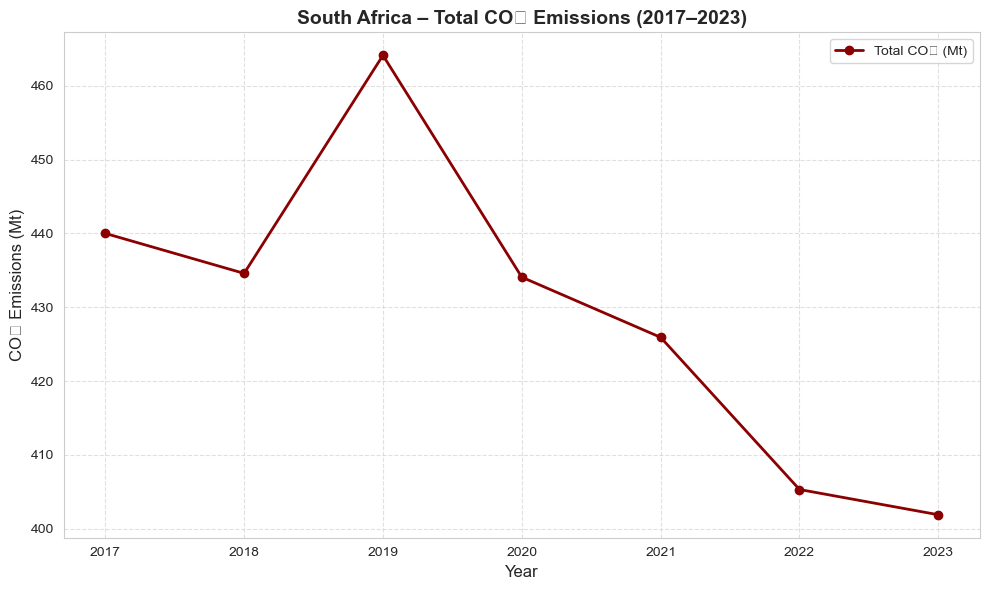

In [25]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
total_co2 = [439.996, 434.581, 464.114, 434.067, 425.918, 405.312, 401.893]

plt.figure(figsize=(10,6))
plt.plot(years, total_co2, marker='o', color='darkred', linewidth=2, label="Total CO₂ (Mt)")

plt.title("South Africa – Total CO₂ Emissions (2017–2023)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (Mt)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

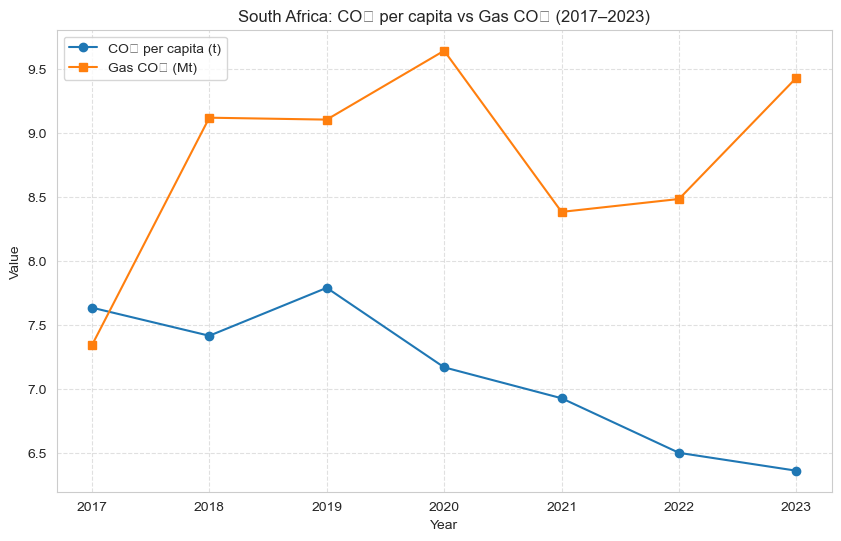

In [26]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

co2_per_capita = [7.634, 7.414, 7.789, 7.167, 6.925, 6.498, 6.358]
gas_co2 = [7.339, 9.120, 9.105, 9.644, 8.383, 8.484, 9.433]

plt.figure(figsize=(10, 6))
plt.plot(years, co2_per_capita, marker='o', label="CO₂ per capita (t)")
plt.plot(years, gas_co2, marker='s', label="Gas CO₂ (Mt)")

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("South Africa: CO₂ per capita vs Gas CO₂ (2017–2023)")

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

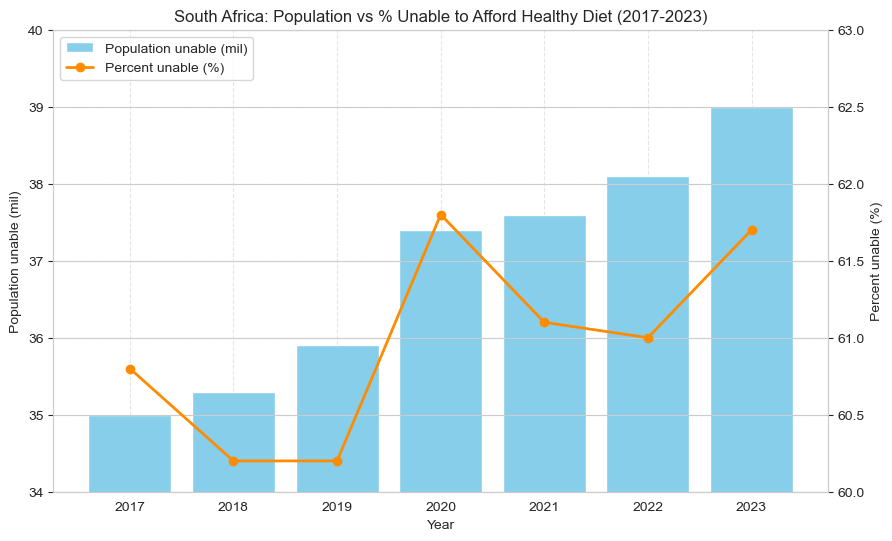

In [27]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
percent_unable = [60.8, 60.2, 60.2, 61.8, 61.1, 61.0, 61.7]
mil_unable = [35.0, 35.3, 35.9, 37.4, 37.6, 38.1, 39.0]

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(years, mil_unable, color='skyblue', label='Population unable (mil)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population unable (mil)')
ax1.tick_params(axis='y')
ax1.set_ylim(34, 40)

ax2 = ax1.twinx()
ax2.plot(years, percent_unable, color='darkorange', marker='o', linewidth=2, label='Percent unable (%)')
ax2.set_ylabel('Percent unable (%)')
ax2.tick_params(axis='y')
ax2.set_ylim(60, 63)

plt.title('South Africa: Population vs % Unable to Afford Healthy Diet (2017-2023)')
ax1.grid(True, linestyle='--', alpha=0.5)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## Question 4: Database Integration

In [28]:
import sqlite3

conn = sqlite3.connect('sa_data.db')
cursor = conn.cursor()

In [29]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sa_data (
    Year INTEGER PRIMARY KEY,
    Total_CO2 REAL,
    Coal_CO2 REAL,
    Gas_CO2 REAL,
    Oil_CO2 REAL,
    CO2_per_capita REAL,
    Diet_percent REAL,
    Diet_mil REAL
)
''')
conn.commit()

In [30]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
total_co2 = [439.996, 434.581, 464.114, 434.067, 425.918, 405.312, 401.893]
coal_co2 = [369.921, 355.115, 394.345, 373.889, 355.642, 335.074, 329.773]
gas_co2 = [7.339, 9.120, 9.105, 9.644, 8.383, 8.484, 9.433]
oil_co2 = [57.224, 64.823, 55.169, 45.408, 56.558, 56.434, 57.361]
co2_per_capita = [7.634, 7.414, 7.789, 7.167, 6.925, 6.498, 6.358]
diet_percent = [60.8, 60.2, 60.2, 61.8, 61.1, 61.0, 61.7]
diet_mil = [35.0, 35.3, 35.9, 37.4, 37.6, 38.1, 39.0]

for i in range(len(years)):
    cursor.execute('''
    INSERT OR REPLACE INTO sa_data (Year, Total_CO2, Coal_CO2, Gas_CO2, Oil_CO2, CO2_per_capita, Diet_percent, Diet_mil)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', (years[i], total_co2[i], coal_co2[i], gas_co2[i], oil_co2[i], co2_per_capita[i], diet_percent[i], diet_mil[i]))

conn.commit()

In [31]:
df = pd.read_sql_query("SELECT * FROM sa_data", conn)
print(df)

   Year  Total_CO2  Coal_CO2  Gas_CO2  Oil_CO2  CO2_per_capita  Diet_percent  \
0  2017    439.996   369.921    7.339   57.224           7.634          60.8   
1  2018    434.581   355.115    9.120   64.823           7.414          60.2   
2  2019    464.114   394.345    9.105   55.169           7.789          60.2   
3  2020    434.067   373.889    9.644   45.408           7.167          61.8   
4  2021    425.918   355.642    8.383   56.558           6.925          61.1   
5  2022    405.312   335.074    8.484   56.434           6.498          61.0   
6  2023    401.893   329.773    9.433   57.361           6.358          61.7   

   Diet_mil  
0      35.0  
1      35.3  
2      35.9  
3      37.4  
4      37.6  
5      38.1  
6      39.0  


In [32]:
df_high_diet = pd.read_sql_query("SELECT Year, Diet_mil FROM sa_data WHERE Diet_mil > 37", conn)
print(df_high_diet)

   Year  Diet_mil
0  2020      37.4
1  2021      37.6
2  2022      38.1
3  2023      39.0


In [33]:
query = """
SELECT Year, Total_CO2, Diet_mil, Diet_percent
FROM sa_data
ORDER BY Year
"""
df_corr = pd.read_sql_query(query, conn)
print(df_corr)

   Year  Total_CO2  Diet_mil  Diet_percent
0  2017    439.996      35.0          60.8
1  2018    434.581      35.3          60.2
2  2019    464.114      35.9          60.2
3  2020    434.067      37.4          61.8
4  2021    425.918      37.6          61.1
5  2022    405.312      38.1          61.0
6  2023    401.893      39.0          61.7


In [34]:
cursor.execute("SELECT Year, CO2_per_capita FROM sa_data ORDER BY CO2_per_capita DESC LIMIT 1")
print(cursor.fetchall())

[(2019, 7.789)]


In [35]:
df_avg = pd.read_sql_query("""
SELECT 
    AVG(Total_CO2) as Avg_Total_CO2,
    AVG(Diet_mil) as Avg_Diet_mil
FROM sa_data
""", conn)
print(df_avg)

   Avg_Total_CO2  Avg_Diet_mil
0     429.411571          36.9


In [36]:
df_trend = pd.read_sql_query("""
SELECT a.Year, a.Total_CO2, b.Total_CO2 as Prev_Total_CO2
FROM sa_data a
JOIN sa_data b ON a.Year = b.Year + 1
WHERE a.Total_CO2 < b.Total_CO2
""", conn)
print(df_trend)

   Year  Total_CO2  Prev_Total_CO2
0  2018    434.581         439.996
1  2020    434.067         464.114
2  2021    425.918         434.067
3  2022    405.312         425.918
4  2023    401.893         405.312


In [37]:
cursor.execute("""
UPDATE sa_data
SET CO2_per_capita = 7.17
WHERE Year = 2020
""")
conn.commit()

In [38]:
df_all = pd.read_sql_query("SELECT * FROM sa_data", conn)
print(df_all)

   Year  Total_CO2  Coal_CO2  Gas_CO2  Oil_CO2  CO2_per_capita  Diet_percent  \
0  2017    439.996   369.921    7.339   57.224           7.634          60.8   
1  2018    434.581   355.115    9.120   64.823           7.414          60.2   
2  2019    464.114   394.345    9.105   55.169           7.789          60.2   
3  2020    434.067   373.889    9.644   45.408           7.170          61.8   
4  2021    425.918   355.642    8.383   56.558           6.925          61.1   
5  2022    405.312   335.074    8.484   56.434           6.498          61.0   
6  2023    401.893   329.773    9.433   57.361           6.358          61.7   

   Diet_mil  
0      35.0  
1      35.3  
2      35.9  
3      37.4  
4      37.6  
5      38.1  
6      39.0  


In [39]:
cursor.execute("""
UPDATE sa_data
SET CO2_per_capita = 7.17
WHERE Year = 2020
""")
conn.commit()

In [40]:
df_all = pd.read_sql_query("SELECT * FROM sa_data", conn)
print(df_all)

   Year  Total_CO2  Coal_CO2  Gas_CO2  Oil_CO2  CO2_per_capita  Diet_percent  \
0  2017    439.996   369.921    7.339   57.224           7.634          60.8   
1  2018    434.581   355.115    9.120   64.823           7.414          60.2   
2  2019    464.114   394.345    9.105   55.169           7.789          60.2   
3  2020    434.067   373.889    9.644   45.408           7.170          61.8   
4  2021    425.918   355.642    8.383   56.558           6.925          61.1   
5  2022    405.312   335.074    8.484   56.434           6.498          61.0   
6  2023    401.893   329.773    9.433   57.361           6.358          61.7   

   Diet_mil  
0      35.0  
1      35.3  
2      35.9  
3      37.4  
4      37.6  
5      38.1  
6      39.0  


In [41]:
cursor.execute("""
DELETE FROM sa_data
WHERE Year = 2023
""")
conn.commit()

In [42]:
df_all = pd.read_sql_query("SELECT * FROM sa_data", conn)
print(df_all)

   Year  Total_CO2  Coal_CO2  Gas_CO2  Oil_CO2  CO2_per_capita  Diet_percent  \
0  2017    439.996   369.921    7.339   57.224           7.634          60.8   
1  2018    434.581   355.115    9.120   64.823           7.414          60.2   
2  2019    464.114   394.345    9.105   55.169           7.789          60.2   
3  2020    434.067   373.889    9.644   45.408           7.170          61.8   
4  2021    425.918   355.642    8.383   56.558           6.925          61.1   
5  2022    405.312   335.074    8.484   56.434           6.498          61.0   

   Diet_mil  
0      35.0  
1      35.3  
2      35.9  
3      37.4  
4      37.6  
5      38.1  


In [43]:
try:
    cursor.execute("""
    UPDATE sa_data
    SET Diet_mil = 39.1
    WHERE Year = 2022
    """)
    conn.commit()
except Exception as e:
    conn.rollback()
    print("Error:", e)

In [44]:
df_all = pd.read_sql_query("SELECT * FROM sa_data", conn)
print(df_all)

   Year  Total_CO2  Coal_CO2  Gas_CO2  Oil_CO2  CO2_per_capita  Diet_percent  \
0  2017    439.996   369.921    7.339   57.224           7.634          60.8   
1  2018    434.581   355.115    9.120   64.823           7.414          60.2   
2  2019    464.114   394.345    9.105   55.169           7.789          60.2   
3  2020    434.067   373.889    9.644   45.408           7.170          61.8   
4  2021    425.918   355.642    8.383   56.558           6.925          61.1   
5  2022    405.312   335.074    8.484   56.434           6.498          61.0   

   Diet_mil  
0      35.0  
1      35.3  
2      35.9  
3      37.4  
4      37.6  
5      39.1  


In [45]:
conn.commit()
conn.close()

## Question 5: Python/Excel Data Analysis

In [46]:
conn = sqlite3.connect('sa_data.db')
df = pd.read_sql_query("SELECT * FROM sa_data", conn)
conn.close()
print(df.isnull().sum())

Year              0
Total_CO2         0
Coal_CO2          0
Gas_CO2           0
Oil_CO2           0
CO2_per_capita    0
Diet_percent      0
Diet_mil          0
dtype: int64


In [47]:
df.fillna(0, inplace=True)
df['Total_CO2_change'] = df['Total_CO2'].diff()
df['Diet_mil_change'] = df['Diet_mil'].diff()

In [48]:
df['Total_CO2_pct_change'] = df['Total_CO2'].pct_change() * 100
df['Diet_mil_pct_change'] = df['Diet_mil'].pct_change() * 100

df = df.round(2)

In [49]:
df.to_excel("sa_data_clean.xlsx", index=False)